In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy

In [2]:
train_format = ImageDataGenerator(rescale=1/255, 
                                  shear_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True,                                   
                                  )
valid_format = ImageDataGenerator(rescale=1/255, 
                                 )

In [3]:
train_dataset = train_format.flow_from_directory('dataset/train/', target_size=(64,64), batch_size=32, class_mode='categorical')
valid_dataset = valid_format.flow_from_directory('dataset/valid/', target_size=(64,64), batch_size=32, class_mode='categorical')


Found 1920 images belonging to 4 classes.


Found 240 images belonging to 4 classes.


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=4,activation='softmax'))


In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_fit = model.fit(train_dataset,epochs=10,validation_data=valid_dataset)

Epoch 1/10
60/60 [==============================] - 7s 101ms/step - loss: 1.3691 - accuracy: 0.3854 - val_loss: 1.0148 - val_accuracy: 0.5875
Epoch 2/10
60/60 [==============================] - 6s 101ms/step - loss: 1.0619 - accuracy: 0.5448 - val_loss: 0.8833 - val_accuracy: 0.6292
Epoch 3/10
60/60 [==============================] - 7s 109ms/step - loss: 0.9460 - accuracy: 0.6120 - val_loss: 0.8499 - val_accuracy: 0.6417
Epoch 4/10
60/60 [==============================] - 6s 100ms/step - loss: 0.8211 - accuracy: 0.6589 - val_loss: 0.7228 - val_accuracy: 0.7458
Epoch 5/10
60/60 [==============================] - 6s 96ms/step - loss: 0.7105 - accuracy: 0.7245 - val_loss: 0.7264 - val_accuracy: 0.6833
Epoch 6/10
60/60 [==============================] - 6s 94ms/step - loss: 0.6135 - accuracy: 0.7573 - val_loss: 0.7879 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 6s 94ms/step - loss: 0.5406 - accuracy: 0.8052 - val_loss: 0.7879 - val_accuracy: 0.6917
Epoch 8/1

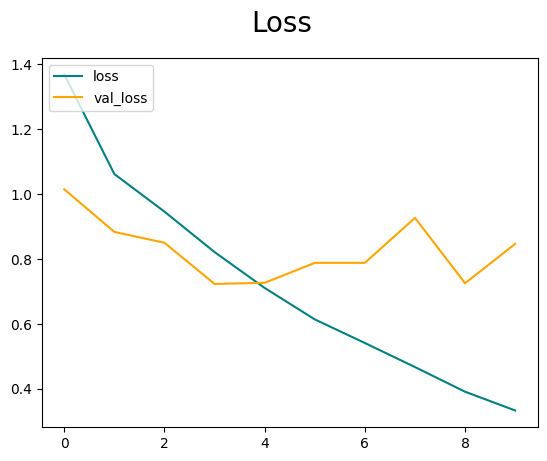

In [14]:
fig = plt.figure()
plt.plot(model_fit.history['loss'], color='teal', label='loss')
plt.plot(model_fit.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

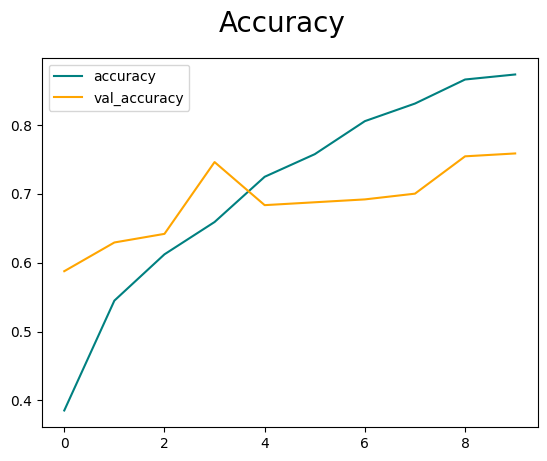

In [15]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

1/1 [==============================] - 0s 59ms/step
Fumio Kishida


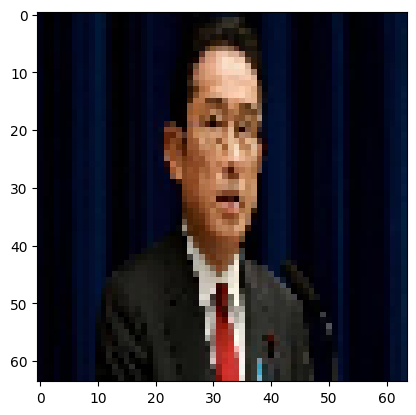

In [16]:
img = image.load_img("dataset/test/fumio_kishida/FumioKishida15 - Copy.jpg", target_size=(64,64))
plt.imshow(img)
temp = image.img_to_array(img)
temp = np.expand_dims(temp,axis=0)
images = np.vstack([temp])
val = model.predict(images)
if val[0][0]==1:
    print("Fumio Kishida")
elif val[0][1]==1:
    print("Joe Biden")
elif val[0][2]==1:
    print("Narendra Modi")
elif val[0][3]==1:
    print("Scott Morrison")

In [17]:
print(val)

[[1. 0. 0. 0.]]


In [20]:
tf.nn.softmax(model.predict(images))

1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.47536686, 0.17487772, 0.17487772, 0.17487772]], dtype=float32)>